# Import

In [1]:
%env SM_FRAMEWORK=tf.keras

# 패키지 불러오기
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np 
import pandas as pd
import random

from sklearn.model_selection import train_test_split

from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import backend as keras

from glob import glob

from segmentation_models import Unet
from segmentation_models.metrics import iou_score

from scipy import ndimage
from tqdm.notebook import tqdm

import cv2
import cv2 as cv2
import multiprocessing
import os

env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


### 압축파일의 이미지 가져오기

In [2]:
''' import zipfile

zip_path_list = [# './Validation/Annotations/1.TOA/1.Frontback_N01.zip',
                 # './Validation/Annotations/1.TOA/1.Frontback_N02.zip',
                 # './Validation/Annotations/1.TOA/1.Frontback_N03.zip',
                 # './Validation/Annotations/1.TOA/2.Highway_N01.zip',
                 # './Validation/Annotations/1.TOA/3.Industrialroads_N01.zip',
                 # './Validation/Annotations/1.TOA/3.Industrialroads_N02.zip',
                 # './Validation/Annotations/1.TOA/3.Industrialroads_N03.zip',
                 # './Validation/Annotations/1.TOA/4.Kidzone_N01.zip',
                 # './Validation/Annotations/1.TOA/4.Kidzone_N02.zip',
                 # './Validation/Annotations/1.TOA/5.Mainroad_N01.zip',
                 # './Validation/Annotations/1.TOA/5.Mainroad_N02.zip',
                 './Validation/Annotations/2.CRACK/C_Frontback_M01.zip',
                 './Validation/Annotations/2.CRACK/C_Frontback_M02.zip',
                 './Validation/Annotations/2.CRACK/C_Highway_M01.zip',
                 './Validation/Annotations/2.CRACK/C_Industrialroads_M01.zip',
                 './Validation/Annotations/2.CRACK/C_Kidzone_M01.zip',
                 './Validation/Annotations/2.CRACK/C_Mainroad_M01.zip',
                 './Validation/Annotations/2.CRACK/C_Mainroad_M02.zip'
]
for zip_path in zip_path_list:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('./Annotations/') '''

" import zipfile\n\nzip_path_list = [# './Validation/Annotations/1.TOA/1.Frontback_N01.zip',\n                 # './Validation/Annotations/1.TOA/1.Frontback_N02.zip',\n                 # './Validation/Annotations/1.TOA/1.Frontback_N03.zip',\n                 # './Validation/Annotations/1.TOA/2.Highway_N01.zip',\n                 # './Validation/Annotations/1.TOA/3.Industrialroads_N01.zip',\n                 # './Validation/Annotations/1.TOA/3.Industrialroads_N02.zip',\n                 # './Validation/Annotations/1.TOA/3.Industrialroads_N03.zip',\n                 # './Validation/Annotations/1.TOA/4.Kidzone_N01.zip',\n                 # './Validation/Annotations/1.TOA/4.Kidzone_N02.zip',\n                 # './Validation/Annotations/1.TOA/5.Mainroad_N01.zip',\n                 # './Validation/Annotations/1.TOA/5.Mainroad_N02.zip',\n                 './Validation/Annotations/2.CRACK/C_Frontback_M01.zip',\n                 './Validation/Annotations/2.CRACK/C_Frontback_M02.zip',\n        

### 압축 파일의 Json 가져오기

In [3]:
''' import zipfile

zip_path_list = [# './Validation/Images/1.TOA/1.Frontback_N01.zip',
                 # './Validation/Images/1.TOA/1.Frontback_N02.zip',
                 # './Validation/Images/1.TOA/1.Frontback_N03.zip',
                 # './Validation/Images/1.TOA/2.Highway_N01.zip',
                 # './Validation/Images/1.TOA/3.Industrialroads_N01.zip',
                 # './Validation/Images/1.TOA/3.Industrialroads_N02.zip',
                 # './Validation/Images/1.TOA/3.Industrialroads_N03.zip',
                 # './Validation/Images/1.TOA/4.Kidzone_N01.zip',
                 # './Validation/Images/1.TOA/4.Kidzone_N02.zip',
                 # './Validation/Images/1.TOA/5.Mainroad_N01.zip',
                 # './Validation/Images/1.TOA/5.Mainroad_N02.zip',
                 './Validation/Images/2.CRACK/C_Frontback_M01.zip',
                 './Validation/Images/2.CRACK/C_Frontback_M02.zip',
                 './Validation/Images/2.CRACK/C_Highway_M01.zip',
                 './Validation/Images/2.CRACK/C_Industrialroads_M01.zip',
                 './Validation/Images/2.CRACK/C_Kidzone_M01.zip',
                 './Validation/Images/2.CRACK/C_Mainroad_M01.zip',
                 './Validation/Images/2.CRACK/C_Mainroad_M02.zip'
]

for zip_path in zip_path_list:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('./Images/') '''

" import zipfile\n\nzip_path_list = [# './Validation/Images/1.TOA/1.Frontback_N01.zip',\n                 # './Validation/Images/1.TOA/1.Frontback_N02.zip',\n                 # './Validation/Images/1.TOA/1.Frontback_N03.zip',\n                 # './Validation/Images/1.TOA/2.Highway_N01.zip',\n                 # './Validation/Images/1.TOA/3.Industrialroads_N01.zip',\n                 # './Validation/Images/1.TOA/3.Industrialroads_N02.zip',\n                 # './Validation/Images/1.TOA/3.Industrialroads_N03.zip',\n                 # './Validation/Images/1.TOA/4.Kidzone_N01.zip',\n                 # './Validation/Images/1.TOA/4.Kidzone_N02.zip',\n                 # './Validation/Images/1.TOA/5.Mainroad_N01.zip',\n                 # './Validation/Images/1.TOA/5.Mainroad_N02.zip',\n                 './Validation/Images/2.CRACK/C_Frontback_M01.zip',\n                 './Validation/Images/2.CRACK/C_Frontback_M02.zip',\n                 './Validation/Images/2.CRACK/C_Highway_M01.zip',\n      

### Polyline 그리기

In [4]:
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json
from tqdm import tqdm

from PIL import Image, ImageDraw

In [5]:
''' import shutil
from PIL import Image, ImageDraw
import json
import os
import numpy as np

def extract_polyline(json_path, image_path, mask_all, image_data_path):
    os.makedirs(mask_all, exist_ok=True)
    os.makedirs(image_data_path, exist_ok=True)

    json_files = [f for f in os.listdir(json_path) if f.endswith('PLINE.json')]

    for file_name in json_files:
        image_name = file_name[0:-11] + '.png'
        if image_name in os.listdir(image_path):
            try:
                file_path = os.path.join(json_path, file_name)
                with open(file_path, 'r') as json_file:
                    data = json.load(json_file)

                polylines = []
                for ann in data.get('annotations', []):
                    polyline = ann.get('polyline')
                    if polyline:
                        polylines.append(polyline)

                if not polylines:
                    continue

                width = data['images']['width']
                height = data['images']['height']
                img = Image.new('RGB', (width, height), color='black')
                draw = ImageDraw.Draw(img)

                for lines in polylines:
                    for line in lines:
                        if line is not None and len(line) > 0:  # None 값과 비어있는 Polyline 제외
                            line = np.array(line).reshape(-1, 2)
                            line = line.astype(np.int32)
                            draw.line(tuple(map(tuple, line)), fill='white', width=4)

                mask_file_name = file_name[0:-11] + '_mask.png'
                mask_file_path = os.path.join(mask_all, mask_file_name)
                img.save(mask_file_path)

                # 이미지 복사
                source_image_path = os.path.join(image_path, image_name)
                destination_image_path = os.path.join(image_data_path, image_name)
                shutil.copyfile(source_image_path, destination_image_path)

            except Exception as e:
                # print(f"Error processing file: {file_name}")
                # print(f"Error message: {str(e)}")
                continue

# 사용 예시
json_path = './Annotations/'
image_path = './Images/'
mask_all = './MASK_Data/'
image_data_path = './Image_Data/'

extract_polyline(json_path, image_path, mask_all, image_data_path) '''

# Import

In [1]:
%env SM_FRAMEWORK=tf.keras

# 패키지 불러오기
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np 
import pandas as pd
import random
from tqdm import tqdm

from sklearn.model_selection import train_test_split

from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import backend as keras

from glob import glob

# import tensorflow_addons as tfa

from scipy import ndimage

import cv2
import cv2 as cv2
import multiprocessing
import os

env: SM_FRAMEWORK=tf.keras


In [2]:
import tensorflow as tf

print(tf.__version__)

2.10.0


In [3]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9463772858767710387
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9383706624
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15104077914001284111
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:b3:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [5]:
import random
import os
import shutil

# 데이터 경로
original_path = "./Image_Data/"
label_path = "./MASK_Data/"

# 분할 비율 (훈련:검증:테스트)
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# 분할된 데이터가 저장될 디렉토리
output_dir = "./data/"

# 랜덤 시드 설정
random_seed = 42
random.seed(random_seed)

In [6]:
# 원본 이미지와 마스크 이미지 파일 목록 가져오기
original_files = os.listdir(original_path)
label_files = os.listdir(label_path)

# 데이터 세트의 인덱스를 계산
num_samples = len(original_files)
num_train = int(num_samples * train_ratio)
num_val = int(num_samples * val_ratio)

# 데이터 인덱스 생성
indices = list(range(num_samples))
random.shuffle(indices)

# 분할된 데이터를 저장할 디렉토리 생성
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, "train/images/images"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "train/masks/masks"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "validation/images/images"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "validation/masks/masks"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test/images/images"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test/masks/masks"), exist_ok=True)

In [7]:
''' # 훈련 세트 복사
for i in tqdm(indices[:num_train]):
    original_file = original_files[i]
    label_file = label_files[i]
    shutil.copy(os.path.join(original_path, original_file), os.path.join(output_dir, "train/images/images"))
    shutil.copy(os.path.join(label_path, label_file), os.path.join(output_dir, "train/masks/masks"))

# 검증 세트 복사
for i in tqdm(indices[num_train:num_train + num_val]):
    original_file = original_files[i]
    label_file = label_files[i]
    shutil.copy(os.path.join(original_path, original_file), os.path.join(output_dir, "validation/images/images"))
    shutil.copy(os.path.join(label_path, label_file), os.path.join(output_dir, "validation/masks/masks"))

# 테스트 세트 복사
for i in tqdm(indices[num_train + num_val:]):
    original_file = original_files[i]
    label_file = label_files[i]
    shutil.copy(os.path.join(original_path, original_file), os.path.join(output_dir, "test/images/images"))
    shutil.copy(os.path.join(label_path, label_file), os.path.join(output_dir, "test/masks/masks")) '''

100%|██████████| 1353/1353 [00:13<00:00, 100.07it/s]


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 경로 설정
train_image_dir = './data/train/images'
train_mask_dir = './data/train/masks'
validation_image_dir = './data/validation/images'
validation_mask_dir = './data/validation/masks'
test_image_dir = './data/test/images'
test_mask_dir = './data/test/masks'

# 이미지 데이터 생성을 위한 ImageDataGenerator 설정
image_datagen = ImageDataGenerator(rescale=1./255)  # 이미지를 0-1 범위로 정규화

In [9]:
image_height = 256
image_width = 256

batch_size = 16

In [10]:
# 원본 이미지 및 마스킹 이미지 불러오기
train_image_generator = image_datagen.flow_from_directory(
    train_image_dir,
    target_size=(image_height, image_width),
    batch_size = batch_size,
    class_mode=None,
    seed=42
)

train_mask_generator = image_datagen.flow_from_directory(
    train_mask_dir,
    target_size=(image_height, image_width),
    class_mode=None,
    batch_size = batch_size,
    seed=42,
)

validation_image_generator = image_datagen.flow_from_directory(
    validation_image_dir,
    target_size=(image_height, image_width),
    class_mode=None,
    batch_size = batch_size,
    seed=42
)

validation_mask_generator = image_datagen.flow_from_directory(
    validation_mask_dir,
    target_size=(image_height, image_width),
    class_mode=None,
    batch_size = batch_size,
    seed=42,
)

test_image_generator = image_datagen.flow_from_directory(
    test_image_dir,
    target_size=(image_height, image_width),
    class_mode=None,
    batch_size = batch_size,
    seed=42
)

test_mask_generator = image_datagen.flow_from_directory(
    test_mask_dir,
    target_size=(image_height, image_width),
    class_mode=None,
    batch_size = batch_size,
    seed=42,
)

Found 9463 images belonging to 1 classes.
Found 9463 images belonging to 1 classes.
Found 2703 images belonging to 1 classes.
Found 2703 images belonging to 1 classes.
Found 1353 images belonging to 1 classes.
Found 1353 images belonging to 1 classes.


In [11]:
# 학습 데이터 생성기
train_generator = zip(train_image_generator, train_mask_generator)

# 학습 데이터 생성기
validation_generator = zip(validation_image_generator, validation_mask_generator)

# 학습 데이터 생성기
test_generator = zip(test_image_generator, test_mask_generator)

In [12]:
import math

train_step = math.ceil(train_image_generator.n / batch_size)
valid_step = math.ceil(validation_image_generator.n / batch_size)
test_step = math.ceil(test_image_generator.n / batch_size)

In [5]:
# MeanIoU 함수 정의
class MeanIoU(object):
    """Mean intersection over union (mIoU) metric.
    Intersection over union (IoU) is a common evaluation metric for semantic
    segmentation. The predictions are first accumulated in a confusion matrix
    and the IoU is computed from it as follows:
        IoU = true_positive / (true_positive + false_positive + false_negative).
    The mean IoU is the mean of IoU between all classes.
    Keyword arguments:
        num_classes (int): number of classes in the classification problem.
    """

    def __init__(self, num_classes):
        super().__init__()

        self.num_classes = num_classes

    def mean_iou(self, y_true, y_pred):
        """The metric function to be passed to the model.
        Args:
            y_true (tensor): True labels.
            y_pred (tensor): Predictions of the same shape as y_true.
        Returns:
            The mean intersection over union as a tensor.
        """

        return tf.compat.v1.py_func(self._mean_iou, [y_true, y_pred], tf.float32)

    def _mean_iou(self, y_true, y_pred):
        """Computes the mean intesection over union using numpy.
        Args:
            y_true (tensor): True labels.
            y_pred (tensor): Predictions of the same shape as y_true.
        Returns:
            The mean intersection over union (np.float32).
        """

        target = np.argmax(y_true, axis=-1).ravel()
        predicted = np.argmax(y_pred, axis=-1).ravel()

        x = predicted + self.num_classes * target
        bincount_2d = np.bincount(
            x.astype(np.int32), minlength=self.num_classes**2
        )
        assert bincount_2d.size == self.num_classes**2
        conf = bincount_2d.reshape(
            (self.num_classes, self.num_classes)
        )

        true_positive = np.diag(conf)
        false_positive = np.sum(conf, 0) - true_positive
        false_negative = np.sum(conf, 1) - true_positive

        with np.errstate(divide='ignore', invalid='ignore'):
            iou = true_positive / (true_positive + false_positive + false_negative)
        iou[np.isnan(iou)] = 1

        return np.mean(iou).astype(np.float32)

# compile에 사용할 mIoU 정의
miou = MeanIoU(num_classes=11)

In [6]:
from segmentation_models import PSPNet
from segmentation_models import FPN
from segmentation_models import Linknet
from segmentation_models import Unet

Segmentation Models: using `tf.keras` framework.


In [15]:
base_model = Unet(backbone_name='resnet34', encoder_weights='imagenet', encoder_freeze=True, activation="sigmoid", classes =3)
model = base_model

In [16]:
# Model Compile
model.compile(optimizer=tf.keras.optimizers.Adam(), loss="MSE", metrics=[miou.mean_iou])

In [17]:
# Model Fitting
hist = model.fit(train_generator,
                 steps_per_epoch = train_step,
                 epochs = 50,
                 validation_data = validation_generator,
                 validation_steps = valid_step)

Epoch 1/50
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
592/592 [==============================] - 454s 752ms/step - loss: 0.0142 - mean_iou: 0.7288 - val_loss: 0.0066 - val_mean_iou: 0.7274
Epoch 2/50
592/592 [==============================] - 322s 544ms/step - loss: 0.0057 - mean_iou: 0.7305 - val_loss: 0.0058 - val_mean_iou: 0.7310
Epoch 3/50
592/592 [===============

In [18]:
model.save('roadmark_DMG_1st.h5')

In [19]:
loss, mean_iou, val_loss, val_mean_iou = hist.history.values()

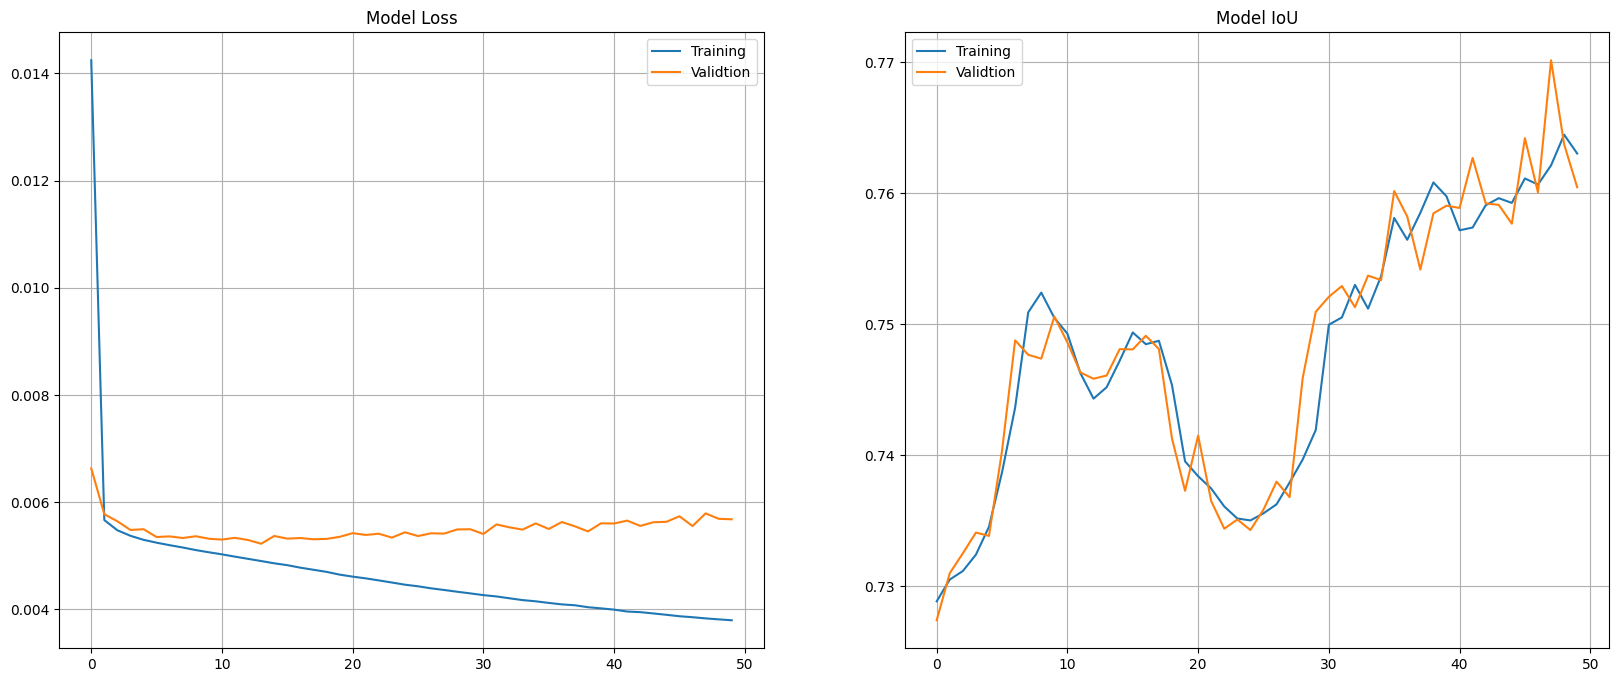

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Model Loss")
plt.plot(loss, label="Training")
plt.plot(val_loss, label="Validtion")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.title("Model IoU")
plt.plot(mean_iou, label="Training")
plt.plot(val_mean_iou, label="Validtion")
plt.legend()
plt.grid()

plt.show()

In [21]:
test_images, test_masks = next(test_generator)

# Model Predict
pred = model.predict_generator(test_images, steps=test_step)

c:\Users\coden\anaconda3\envs\computer_vision\lib\site-packages\ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


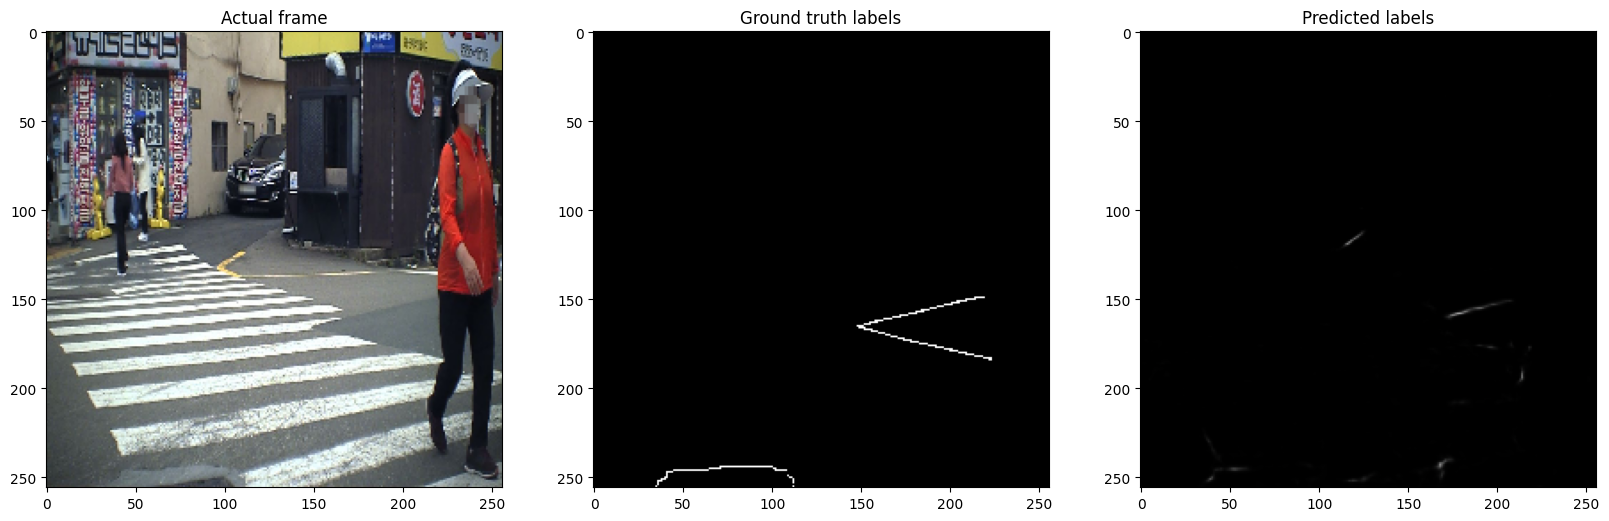

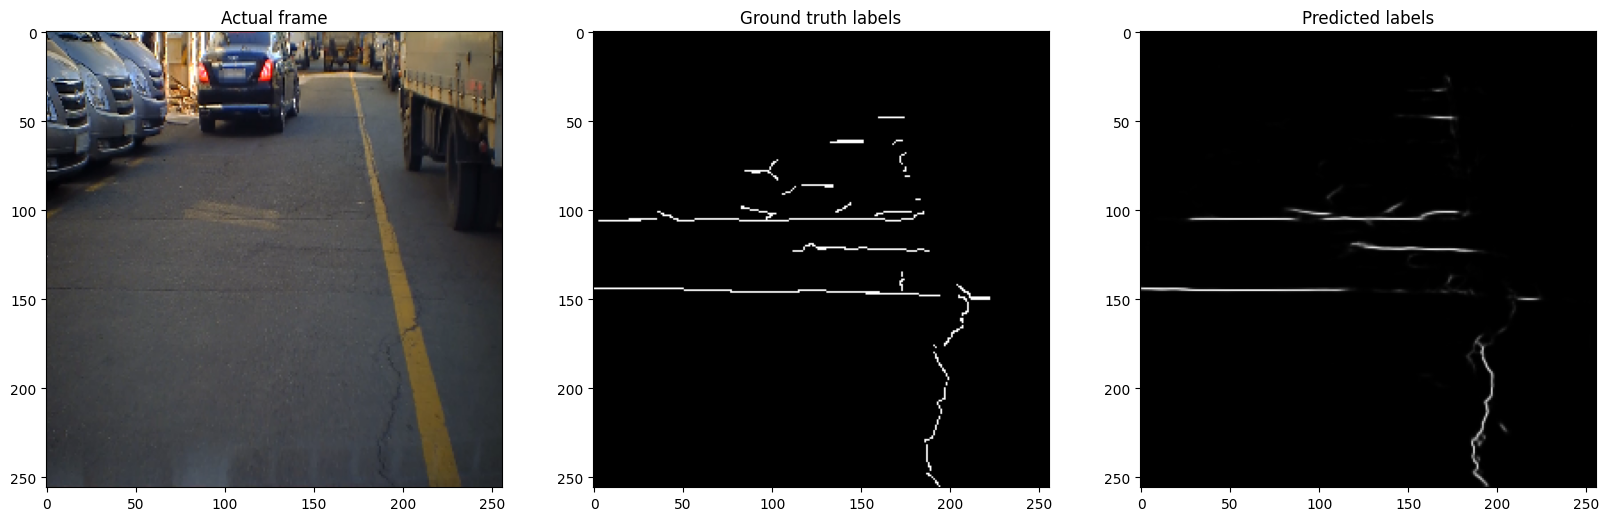

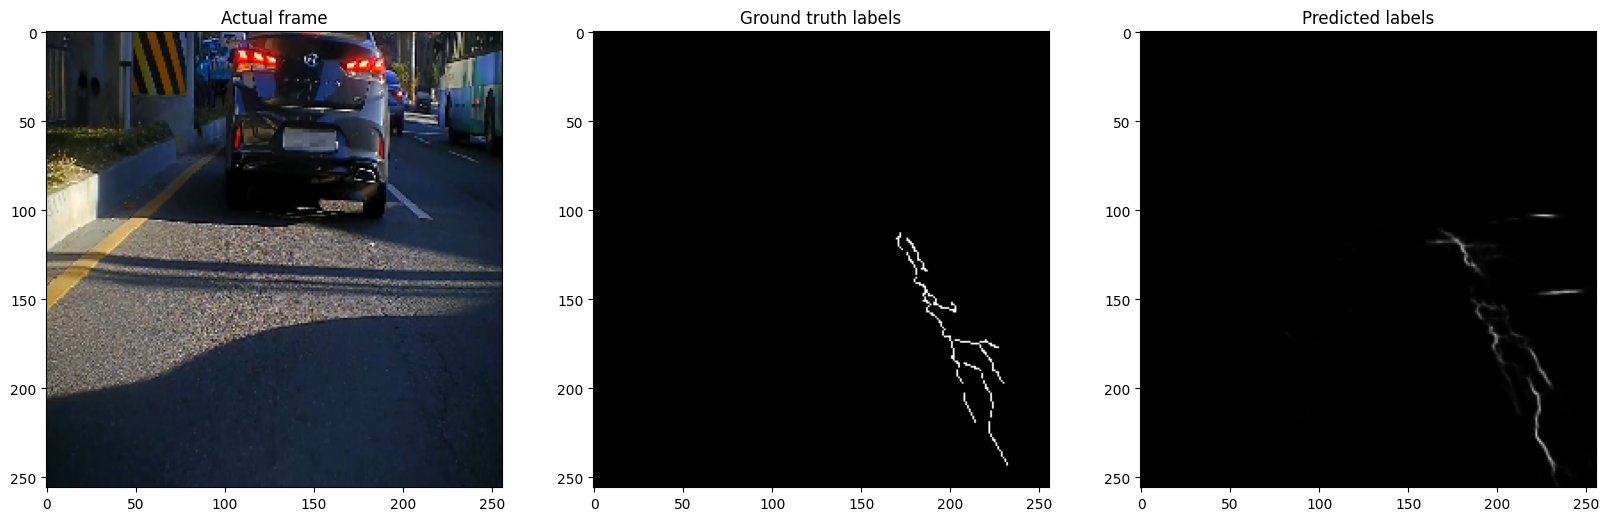

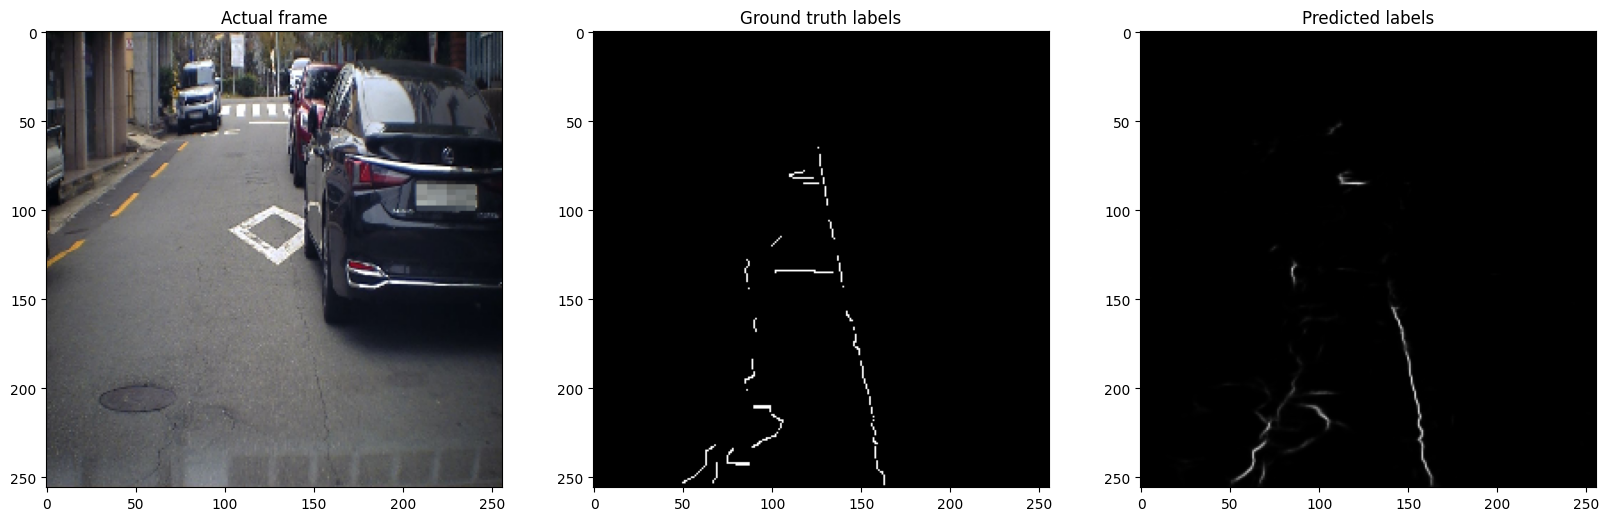

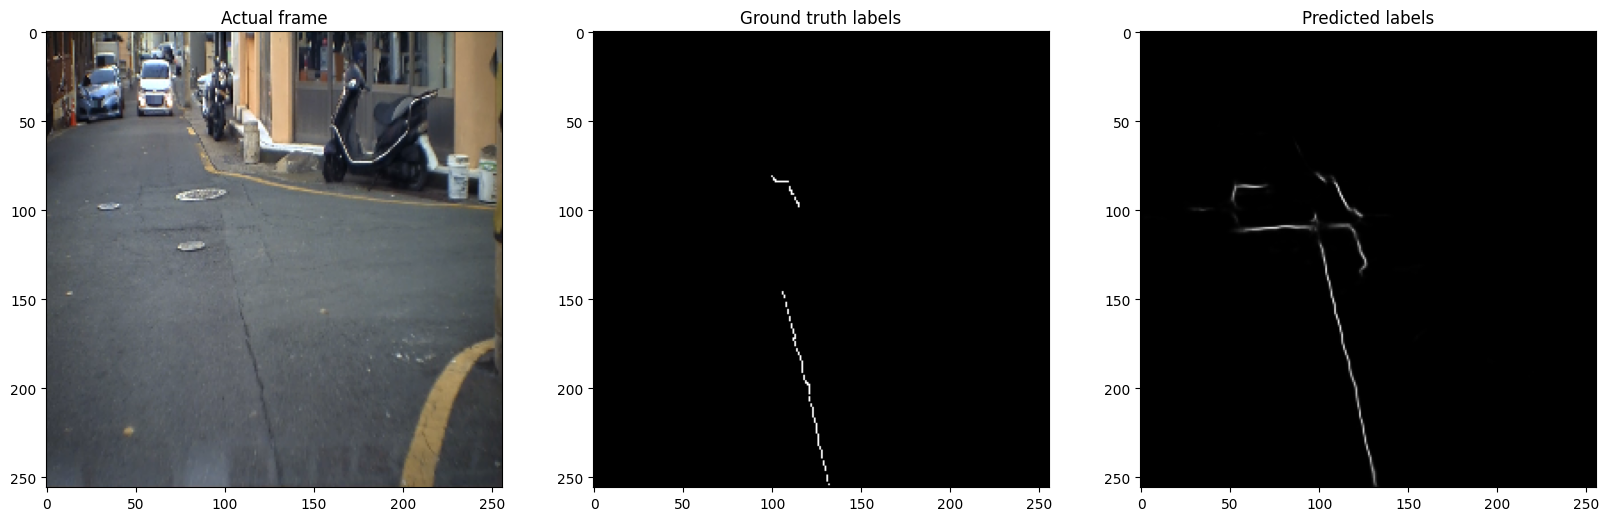

In [22]:
# 랜덤한 5개의 인덱스 선택
random_indices = random.sample(range(len(test_images)), 5)

# 선택된 인덱스에 해당하는 예측 결과 시각화
for i in random_indices:
    fig = plt.figure(figsize=(20, 8))
    
    # 실제 사진 
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.imshow(test_images[i])
    ax1.title.set_text('Actual frame')
    
    # 라벨 사진
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.set_title('Ground truth labels')
    ax2.imshow(test_masks[i])
    
    # 예측 사진
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.set_title('Predicted labels')
    ax3.imshow(pred[i])
    
    plt.show()

In [7]:
from tensorflow.keras.models import load_model

# 모델 불러오기
model = load_model('roadmark_DMG_1st.h5', custom_objects={'mean_iou': miou.mean_iou})

In [24]:
import os

# 결과 저장 경로 설정
result_path = './segmentation_pred_result_1st/'
os.makedirs(result_path, exist_ok=True)

# 테스트 데이터셋 예측 및 결과 저장
for i, (image, mask) in enumerate(test_generator):
    pred = model.predict(image)
    
    for j in range(len(image)):
        fig = plt.figure(figsize=(20, 8))
        
        # 실제 사진 
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.imshow(image[j])
        ax1.title.set_text('Actual frame')
        
        # 라벨 사진
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.set_title('Ground truth labels')
        ax2.imshow(mask[j])
        
        # 예측 사진
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.set_title('Predicted labels')
        ax3.imshow(pred[j])
        
        plt.savefig(f'{result_path}/pred_{i}_{j}.png')
        plt.close(fig)
    
    if i == test_step - 1:
        break

1/1 [==============================] - 0s 38ms/step


In [25]:
import os

# 결과 저장 경로 설정
result_path = './segmentation_pred_result_only_1st/'
os.makedirs(result_path, exist_ok=True)

# 테스트 데이터셋 예측 및 결과 저장
for i, (image, mask) in enumerate(test_generator):
    pred = model.predict(image)
    
    for j in range(len(image)):
        fig = plt.figure(figsize=(8, 8))
        
        # 예측 마스킹 이미지
        ax = fig.add_subplot(1, 1, 1)
        ax.imshow(pred[j])
        ax.set_title('Predicted mask')
        
        plt.savefig(f'{result_path}/pred_{i}_{j}.png')
        plt.close(fig)
    
    if i == test_step - 1:
        break

1/1 [==============================] - 0s 44ms/step


# Road_Mark 데이터에 적용해보기

In [8]:
from tensorflow.keras.models import load_model

# 모델 불러오기
model = load_model('roadmark_DMG_1st.h5', custom_objects={'mean_iou': miou.mean_iou})

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 경로 설정
road_image_dir = './Road_mark/'

# 이미지 데이터 생성을 위한 ImageDataGenerator 설정
image_datagen = ImageDataGenerator(rescale=1./255)  # 이미지를 0-1 범위로 정규화

In [18]:
image_height = 256
image_width = 256

batch_size = 16

In [19]:
road_image_generator = image_datagen.flow_from_directory(
    road_image_dir,
    target_size=(image_height, image_width),
    class_mode=None,
    batch_size = batch_size,
    seed = 42
)

Found 674 images belonging to 1 classes.


In [21]:
import math

road_step = math.ceil(road_image_generator.n / batch_size)

In [27]:
import os

# 결과 저장 경로 설정
result_path = './segmentation_pred_DMG_result_only/'
os.makedirs(result_path, exist_ok=True)

# 테스트 데이터셋 예측 및 결과 저장
for i, image in enumerate(road_image_generator):
    pred = model.predict_generator(image, steps=road_step)
    
    for j in range(len(image)):
        fig = plt.figure(figsize=(20, 8))
        
        # 실제 사진 
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.imshow(image[j])
        ax1.title.set_text('Actual frame')
        
        # 예측 사진
        ax3 = fig.add_subplot(1, 2, 2)
        ax3.set_title('Predicted labels')
        ax3.imshow(pred[j])
        
        plt.savefig(f'{result_path}/pred_{i}_{j}.png')
        plt.close(fig)
    
    if i == road_step - 1:
        break

c:\Users\coden\anaconda3\envs\computer_vision\lib\site-packages\ipykernel_launcher.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if __name__ == "__main__":
